River Kelly

Kyler Gappa

CSCI-347: Data Mining

Final Project

# Part 1: Plan (20 points)

The problem that we are investigating is the association between developed liver disorders and the possible contributing factors that lead to such a diagnosis. It is no question that the consumption of alcoholic beverages increases the chances of developing a liver disorder, but the question still remains why some people are more at risk than others. In addition to alcohol consumption, other compounds found in the liver have been found to have confounding associations.

The data set that we have selected is the [Liver Disorders Data Set](https://archive.ics.uci.edu/ml/datasets/Liver+Disorders) (Forsyth). The data set includes a total of seven attributes. The first five attributes are numerical values pulled from the blood test of the patient. Since these values are thought to be sensitive to liver disease, they may show common traits so that early detection is more viable. The next variable is the number of drinks of alcohol per day. This could be a connecting factor for some of the test results. The final attribute is a categorical variable to help separate the data into test or training sets.

The data mining techniques that we will use to solve this problem include one-hot encoding, dimensionality reductions, and k-means. There exists one categorical attribute within our data set that will need to be converted using the one-hot encoding technique. We plan to use dimensionality reduction across all of the provided attributes in an attempt to identify which attributes have the greatest effect on the k-means. We also plan on utilizing the k-means clustering method to assist in identifying attributes with the highest correlation (i.e. those that generate the clearest clusters.)

If we run out of time we plan to not explore the differences in the training and test categories to reduce the scope of the project from two separate datasets to a single dataset. If this were to happen we would totally ignore the categorical classification and run all testing over the entire dataset as a whole.

# Part 2: Implement (30 points)

## Setup Code

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from google.colab import drive
import numpy.linalg as LA
import os

### Global (Const.) Variables

In [2]:
# file path for the location of the data file
DATA_FILENAME = "/content/drive/My Drive/347-Data-Mining/Final-Project/data/bupa.data"

# dictionary of columns for the data
DATA_COLUMN_NAMES = {
    'mcv': 'Mean Corpuscular Volume',
    'alkphos': 'Alkaline Phosphotase',
    'sgpt': 'Alamine Aminotransferase',
    'sgot': 'Aspartate Aminotransferase',
    'gmmagt': 'Gamma-Glutamyl Transpeptidase',
    'drinks': 'Number of half-pint equivalents of alcoholic beverages drunk per day',
    # 'selector': 'Group' # field used to split data into two sets
}

DATA_COL_VALS = list(DATA_COLUMN_NAMES.values())

dot_colors = ['red', 'orange', 'blue', 'black', 'green']

### Data Import Function

The following function is used read the data's file and parse the contents.

In [3]:
# GetRawDataFromFile()
# returns a 2-dimensional array of the data
def getRawDataFromFile(file: str) -> list:

    # mount to google drive
    drive.mount('/content/drive')

    # check that file exists
    if not os.path.exists(file):
        # file does NOT exist, raise error
        raise RuntimeError(f'File "{file}" does not exist')
    
    # read file's lines
    lines = list()
    with open(file, 'r') as f: lines = f.readlines()

    # unmount google drive
    drive.flush_and_unmount()

    # parse the lines content and create the 2-dimensioal array
    data = list()
    # iterate through each line
    for line in lines: 
        # clean the line string
        line = str(line).strip()

        # if line is empty, skip it
        if line is None or line == "" or len(line) < 1: continue

        # split the line (string) by seperator (",")
        line_data = line.split(',')

        # column 7 (index: 6) needs to be removed
        line_data.pop(6)
        
        # each value in the 'line_data' needs to be converted to a
        # numerical type.
        # All of the columns in the data are of type "int", except
        # for one, column[5], which is a float
        for data_item_index, data_item in enumerate(line_data):
            # is current column index 5?
            if data_item_index in [5]:
                # cast to type float
                data_item = float(data_item)
            else:
                # cast to type int
                data_item = int(data_item)
            # update the data_item value after type casting
            line_data[data_item_index] = data_item
        # append row to (raw) data array
        data.append(line_data)
    
    # return the raw data
    return data

## Data Initialization

Get the `RAW_DATA` (2-dimensional array) from the file contents:

In [4]:
# populate the raw data from the source file contents
RAW_DATA = getRawDataFromFile(DATA_FILENAME)

Mounted at /content/drive


Initialize `DataFrame`:

In [5]:
# create a dataFrame from the RAW_DATA
df = pd.DataFrame(data=RAW_DATA, columns=DATA_COLUMN_NAMES.values())

Initialize `numpy.ndarray`:

In [6]:
# create a numpy multi-dim. array from the RAW_DATA
D = np.ndarray(shape=(len(RAW_DATA), len(RAW_DATA[0])), dtype=float)
# populate the numpy data matrix (array)
for i, row in enumerate(RAW_DATA): D[i] = np.array(row)

### Data Preview

The data is made up by 345 rows (instances) and 6 columns (attributes).

In [7]:
D.shape

(345, 6)

In [8]:
D

array([[85., 92., 45., 27., 31.,  0.],
       [85., 64., 59., 32., 23.,  0.],
       [86., 54., 33., 16., 54.,  0.],
       ...,
       [98., 77., 55., 35., 89., 15.],
       [91., 68., 27., 26., 14., 16.],
       [98., 99., 57., 45., 65., 20.]])

In [9]:
df.describe()

,Mean Corpuscular Volume,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Gamma-Glutamyl Transpeptidase,Number of half-pint equivalents of alcoholic beverages drunk per day
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


### Estimated Covariance Matrix

In [10]:
# get the covariave matrix
Sigma = np.cov(D.T, ddof=1)
Sigma

array([[  19.7855578 ,    3.59934277,   12.81884058,    8.40583923,
          38.81795585,    4.6423576 ],
       [   3.59934277,  336.63700708,   27.28273509,   26.97080384,
          95.89180991,    6.17290192],
       [  12.81884058,   27.28273509,  380.73019885,  145.25846815,
         385.60532524,   13.47177283],
       [   8.40583923,   26.97080384,  145.25846815,  101.29403438,
         208.45331143,    9.39236603],
       [  38.81795585,   95.89180991,  385.60532524,  208.45331143,
        1540.92489046,   44.70902005],
       [   4.6423576 ,    6.17290192,   13.47177283,    9.39236603,
          44.70902005,   11.14114425]])

In [11]:
# print the covariance matrix
frmt_str = '[ ' + ' '.join(["{:<7.2f}"] * Sigma.shape[1]) + ' ]'
for row in Sigma: print(frmt_str.format(*row))

[ 19.79   3.60    12.82   8.41    38.82   4.64    ]
[ 3.60    336.64  27.28   26.97   95.89   6.17    ]
[ 12.82   27.28   380.73  145.26  385.61  13.47   ]
[ 8.41    26.97   145.26  101.29  208.45  9.39    ]
[ 38.82   95.89   385.61  208.45  1540.92 44.71   ]
[ 4.64    6.17    13.47   9.39    44.71   11.14   ]


### Eigenvalues

In [12]:
evalues, evectors = LA.eig(Sigma)

In [13]:
evalues

array([1704.23455772,    8.51379717,   19.59323592,   37.76391713,
        290.92117087,  329.48615401])

In [14]:
evectors

array([[ 2.48915066e-02,  3.11252804e-01, -9.43765959e-01,
         1.08533543e-01,  4.94442234e-03,  1.98561179e-03],
       [ 7.49485205e-02,  6.73102408e-03,  1.32930005e-03,
        -4.14076557e-02, -3.81810281e-02,  9.95571826e-01],
       [ 2.92623798e-01, -1.30836279e-02, -3.21086702e-02,
        -3.49274184e-01,  8.89478140e-01, -2.31264856e-03],
       [ 1.50393856e-01,  5.10442210e-02,  1.28881103e-01,
         9.24576654e-01,  3.19083539e-01,  3.88528379e-02],
       [ 9.40591759e-01,  1.57223279e-02,  2.33472488e-02,
        -4.14320645e-02, -3.24855878e-01, -8.51287245e-02],
       [ 2.83421198e-02, -9.48710968e-01, -3.01857001e-01,
         8.91897708e-02,  8.68807215e-04,  8.42648015e-03]])

Sort eigenvalues (and corresponding vectors) in decending order.

In [15]:
idx = evalues.argsort()[::-1]
evalues = evalues[idx]
evectors = evectors[:, idx]

In [16]:
evalues

array([1704.23455772,  329.48615401,  290.92117087,   37.76391713,
         19.59323592,    8.51379717])

In [17]:
evectors

array([[ 2.48915066e-02,  1.98561179e-03,  4.94442234e-03,
         1.08533543e-01, -9.43765959e-01,  3.11252804e-01],
       [ 7.49485205e-02,  9.95571826e-01, -3.81810281e-02,
        -4.14076557e-02,  1.32930005e-03,  6.73102408e-03],
       [ 2.92623798e-01, -2.31264856e-03,  8.89478140e-01,
        -3.49274184e-01, -3.21086702e-02, -1.30836279e-02],
       [ 1.50393856e-01,  3.88528379e-02,  3.19083539e-01,
         9.24576654e-01,  1.28881103e-01,  5.10442210e-02],
       [ 9.40591759e-01, -8.51287245e-02, -3.24855878e-01,
        -4.14320645e-02,  2.33472488e-02,  1.57223279e-02],
       [ 2.83421198e-02,  8.42648015e-03,  8.68807215e-04,
         8.91897708e-02, -3.01857001e-01, -9.48710968e-01]])

### Total Variance

In [18]:
total_var = sum(np.diag(Sigma))
total_var

2390.512832827772

### Mean Centering

First, we must find the multi-dimensional mean:

In [19]:
multi_d_mean = np.mean(D, axis=0)
multi_d_mean

array([90.15942029, 69.86956522, 30.4057971 , 24.64347826, 38.28405797,
        3.45507246])

Now we can center our data from the multi-dimensional mean:

In [20]:
centered_data = D - multi_d_mean
centered_data

array([[ -5.15942029,  22.13043478,  14.5942029 ,   2.35652174,
         -7.28405797,  -3.45507246],
       [ -5.15942029,  -5.86956522,  28.5942029 ,   7.35652174,
        -15.28405797,  -3.45507246],
       [ -4.15942029, -15.86956522,   2.5942029 ,  -8.64347826,
         15.71594203,  -3.45507246],
       ...,
       [  7.84057971,   7.13043478,  24.5942029 ,  10.35652174,
         50.71594203,  11.54492754],
       [  0.84057971,  -1.86956522,  -3.4057971 ,   1.35652174,
        -24.28405797,  12.54492754],
       [  7.84057971,  29.13043478,  26.5942029 ,  20.35652174,
         26.71594203,  16.54492754]])

### Principle Component Analysis (PCA)

In [21]:
pca = PCA(n_components=2)

In [22]:
pca_transformed_D = pca.fit_transform(D)
pca_transformed_centered_D = pca.fit_transform(centered_data)

## Data Visualization

### Raw Data

Blood tests which are thought to be sensitive to liver disorder that might arise from excessive alcohol consumption.

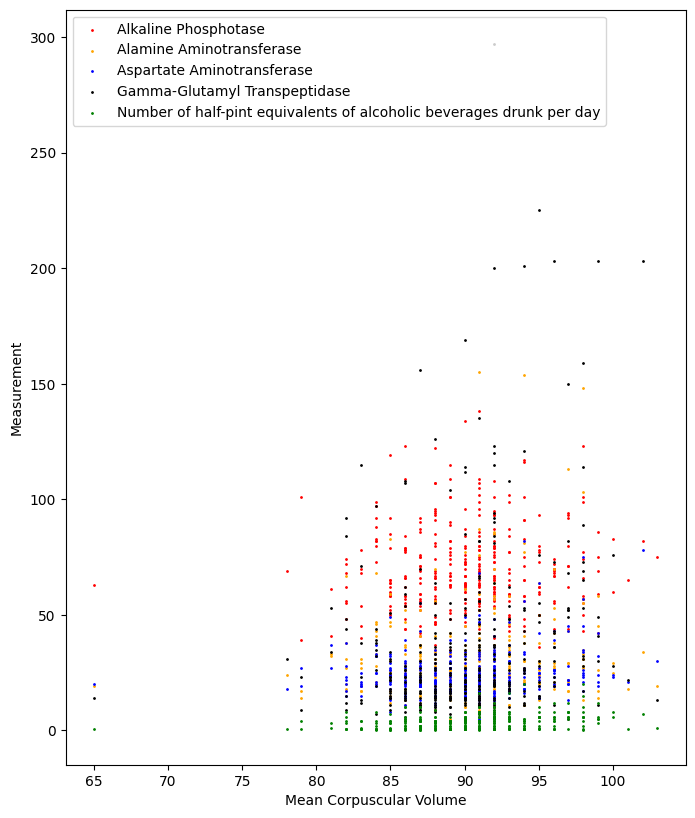

In [23]:
plt.figure(figsize=(8, 10), dpi=100)
for i in range(1, 6):
    plt.scatter(D[:,0], D[:,i], s=1, c=dot_colors[i-1], label=DATA_COL_VALS[i])
plt.ylabel('Measurement')
plt.xlabel(DATA_COL_VALS[0])
plt.legend(loc='upper left')
plt.show()

### Original Data v.s. Mean Centered Data

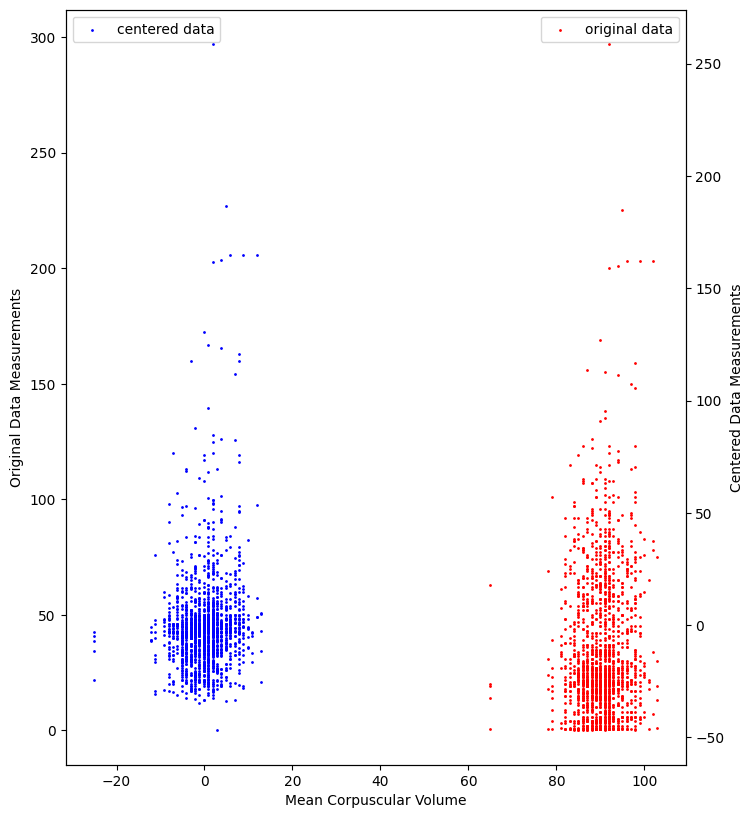

In [24]:
fig = plt.figure(figsize=(8, 10), dpi=100)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
for i in range(1, 6):
    ax1.scatter(D[:,0], D[:,i], s=1, c='red')
for i in range(1, 6):
    ax2.scatter(centered_data[:,0], centered_data[:,i], s=1, c='blue')
ax1.legend(['original data'], loc='upper right')
ax2.legend(['centered data'], loc='upper left')
ax1.set_ylabel('Original Data Measurements')
ax2.set_ylabel('Centered Data Measurements')
ax1.set_xlabel(DATA_COL_VALS[0])
plt.show()

### Centered Data v.s. Projected Data

Let's project our data on to the largest eigenvector.


In [25]:
Sigma_centered = np.cov(pca_transformed_centered_D.T, ddof=1)

evalues_centered, evectors_centered = LA.eig(Sigma_centered)

# sort
idx = evalues_centered.argsort()[::-1]
evalues_centered = evalues_centered[idx]
evectors_centered = evectors_centered[:, idx]

coords_along_eig0 = evectors_centered[:,0].T.dot(pca_transformed_centered_D.T)
coords_along_eig1 = evectors_centered[:,1].T.dot(pca_transformed_centered_D.T)
coords_along_eig0

array([-7.94013907e-01, -5.56860410e+00,  1.28506263e+01, -6.61028704e-01,
       -3.16517168e+01, -2.72797043e+01, -3.24661762e+01, -3.08199894e+01,
       -3.38109526e+01, -3.45647505e+01, -2.85428289e+01, -2.78498460e+01,
       -1.42506455e+01, -2.11624988e+01, -2.69263222e+01, -2.06214855e+01,
       -3.03984727e+01, -2.54608889e+01,  1.56401760e+01, -2.66157360e+01,
       -1.93977566e+01, -2.00776630e+01, -3.39468473e+01, -2.26958953e+01,
        6.18625502e+01, -1.52080423e+01, -2.30350924e+01, -3.06242149e+01,
       -2.14670900e+01, -2.39611948e+01, -2.15265037e+01,  2.39450873e+00,
       -8.74377620e+00,  2.18298389e+00, -2.94751566e+01,  8.41954814e+01,
       -1.06056017e+01, -3.58689708e+01, -8.24794406e+00, -3.46749835e+00,
        1.96572444e+01,  4.11234216e+00, -2.51380221e+01, -2.53193786e+01,
       -2.28387419e+01, -2.84698060e+01, -3.37818461e+01,  9.20970930e+00,
       -2.76135229e+01, -3.12557509e+00, -2.43480207e+01, -2.85873056e+01,
        5.91795101e+01, -

Observe that now, we now have a 1 dimensional representation of our data that captures about 73% of the total variance of the centered data set.

In [26]:
evalues_centered[0]/sum(np.diag(Sigma_centered))

0.8379884946288922

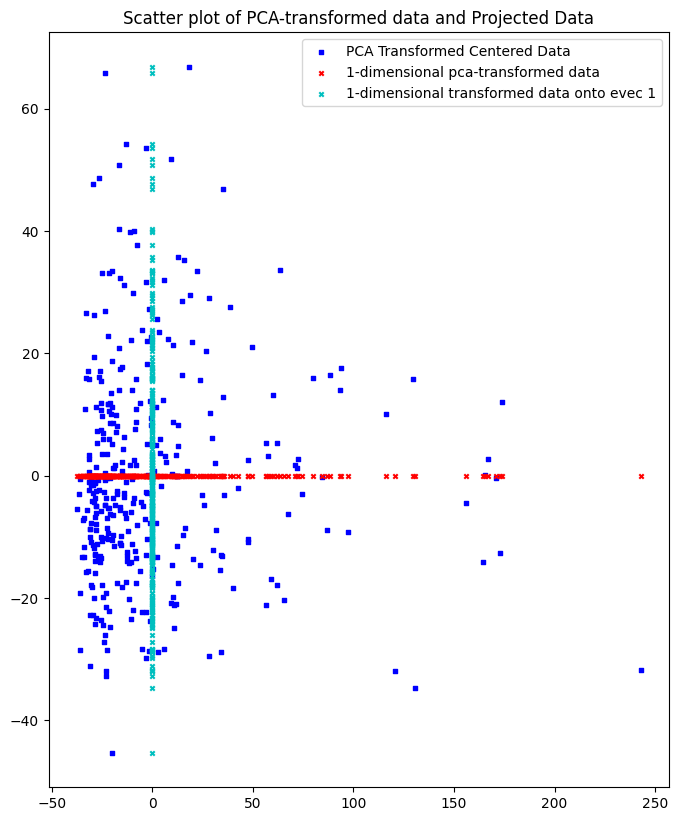

In [27]:
projected_along_eig0 = np.zeros((D.shape[0],2))
for i in range(len(coords_along_eig0)):
    projected_along_eig0[i,:] = coords_along_eig0[i]*evectors_centered[:,0]
projected_along_eig1 = np.zeros((D.shape[0],2))
for i in range(len(coords_along_eig1)):
    projected_along_eig1[i,:] = coords_along_eig1[i]*evectors_centered[:,1]

pjdev0 = projected_along_eig0
pjdev1 = projected_along_eig1

fig = plt.figure(figsize=(8, 10), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(pca_transformed_centered_D[:,0], pca_transformed_centered_D[:,1], s=10, c='b', marker='s', label='PCA Transformed Centered Data')
ax.scatter(pjdev0[:,0], pjdev0[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
ax.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='c', marker='x', label='1-dimensional transformed data onto evec 1')
plt.legend(loc='upper right')
plt.title('Scatter plot of PCA-transformed data and Projected Data')
plt.show()

# Part 3: Report (40 points)

##Problem Statement

We where hoping to help identify key characteristics that can help show potential signs of liver disorders. 

##Data

This data set had 345 intstances and 7 attributes with no missing values.

> All of the attributes in our data were numerical.

##Preprocessing Techniques

To preprocess our data, we used a few techiques. We mean centered our data so that our data results would be standardized between the techiques that require mean centering and those that do not.

##Data Mining Techniques

We used dimensionality reduction to identify which of the attributes has the greatest effect on k-means. We used k-means as it can quickly find special groups of those who have a disorder, who are at a high risk for disorders, and those who are at a low risk for disorders.  It can also show us how greatly an attribute effects the position of a data point when a dimension is reduced.

## Analysis

Data was taken from [_https://archive.ics.uci.edu/ml/datasets/Liver+Disorders_](https://archive.ics.uci.edu/ml/datasets/Liver+Disorders)

## Proportion of Total Variance

In the direction of the largest eigenvalues, we capture 71% of the total variance.

In [28]:
evalues[0]/total_var

0.7129158791006928

### Missing Values

There were no missing values from the data.

In [29]:
df.isnull().sum()

Mean Corpuscular Volume                                                 0
Alkaline Phosphotase                                                    0
Alamine Aminotransferase                                                0
Aspartate Aminotransferase                                              0
Gamma-Glutamyl Transpeptidase                                           0
Number of half-pint equivalents of alcoholic beverages drunk per day    0
dtype: int64

# References

Forsyth, Richard S. “Liver Disorders Data Set.” _UCI Machine Learning Repository_, 15 May 1990, [_https://archive.ics.uci.edu/ml/datasets/Liver+Disorders_](https://archive.ics.uci.edu/ml/datasets/Liver+Disorders). Accessed 14 April 2022.